In [107]:
def print_full(df):
    import pandas as pd
    pd.set_option('display.max_rows', len(df))
    print(df)
    pd.reset_option('display.max_rows')

In [1085]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

In [1338]:
df_all = pd.read_csv('/Users/belinskaia/Desktop/CBI/nfb_old_csv/alpha_old_script/all.csv')
df_all.head(3)

,metric,metric_type,block_number,threshold_factor,block_name,subj_id
0,2.623608,magnitude,1,2.5,Baseline0,1
1,0.194311,n_spindles,1,2.5,Baseline0,1
2,0.101000,duration,1,2.5,Baseline0,1


In [1339]:
df_all.metric_type.unique()

array(['magnitude', 'n_spindles', 'duration', 'amplitude'], dtype=object)

In [1340]:
df_all = df_all.drop(df_all[df_all['subj_id'] == 11].index)
df_all = df_all.drop(df_all[df_all['subj_id'] == 1].index)
#df_all = df_all.drop(df_all[df_all['subj_id'] == 23].index)
#df_all = df_all.drop(df_all[df_all['subj_id'] == 12].index)
#df_all = df_all.drop(df_all[df_all['subj_id'] == 19].index)
#df_all = df_all.drop(df_all[df_all['subj_id'] == 6].index)
#df_all = df_all.drop(df_all[df_all['subj_id'] == 8].index)
#len(df_all.subj_id.unique())

In [1341]:
#f
#df_all.loc[(df_all['subj_id'] ==8) & (df_all['block_name'] == 'FBMock'), ['metric']] = df_all.loc[(df_all['subj_id'] ==22) & (df_all['block_name'] == 'FBMock'),['metric']].values[:]
#df_all.loc[(df_all['subj_id'] ==6) & (df_all['block_name'] == 'FBMock'), ['metric']] = df_all.loc[(df_all['subj_id'] ==6) & (df_all['block_name'] == 'FB1000'),['metric']].values[:]
#df_all.loc[(df_all['subj_id'] ==6) & (df_all['block_name'] == 'FB1000'), ['metric']] = df_all.loc[(df_all['subj_id'] ==5) & (df_all['block_name'] == 'FBMock'),['metric']].values[:]
#df_all.loc[(df_all['subj_id'] ==13) & (df_all['block_name'] == 'FBMock'), ['metric']] = df_all.loc[(df_all['subj_id'] ==9) & (df_all['block_name'] == 'FBMock'),['metric']].values[:]



In [1342]:
df_all.isna().sum()

metric              0
metric_type         0
block_number        0
threshold_factor    0
block_name          0
subj_id             0
dtype: int64

In [1343]:
#print_full(df_all.loc[df_all['subj_id']== 2])

In [1344]:
#print_full(df_all.loc[df_all['block_number']== 47])

In [1345]:
df_all = df_all.loc[df_all['block_name'].isin(['FB0', 'FB500','FB1000','FBMock'])]

In [1346]:
#df_all[df_all['block_name'] == 'Baseline']

In [1347]:
df_all.block_name.unique()

array(['FB0', 'FB500', 'FB1000', 'FBMock'], dtype=object)

In [1348]:
df_all.head(3)

,metric,metric_type,block_number,threshold_factor,block_name,subj_id
224,3.049945,magnitude,6,2.5,FB0,2
225,0.388847,n_spindles,6,2.5,FB0,2
226,0.130714,duration,6,2.5,FB0,2


In [1349]:
group_signal = df_all.groupby(['block_name', 'metric_type', 'subj_id','block_number']).mean()['metric']
group_signal

block_name  metric_type  subj_id  block_number
FB0         amplitude    2        6               9.391494
                                  8               7.594289
                                  10              8.255711
                                  12              7.567940
                                  14              7.366757
                                                    ...   
FBMock      n_spindles   26       6               0.138874
                                  8               0.236086
                                  10              0.187480
                                  12              0.416623
                                  14              1.090164
Name: metric, Length: 1920, dtype: float64

In [1350]:
fin = pd.DataFrame(data = group_signal).reset_index()

In [1351]:
fin.head(3)

,block_name,metric_type,subj_id,block_number,metric
0,FB0,amplitude,2,6,9.391494
1,FB0,amplitude,2,8,7.594289
2,FB0,amplitude,2,10,8.255711


In [1352]:
fin.isna().sum()

block_name      0
metric_type     0
subj_id         0
block_number    0
metric          0
dtype: int64

In [1353]:
### Нормировка

In [1354]:
fin_norm = pd.DataFrame() 

In [1355]:
fin_amp = fin.loc[fin['metric_type'].isin(['amplitude'])]
fin_dur = fin.loc[fin['metric_type'].isin(['duration'])]
fin_mag = fin.loc[fin['metric_type'].isin(['magnitude'])]
fin_spin = fin.loc[fin['metric_type'].isin(['n_spindles'])]

In [1356]:
fin_mag['six'] = fin_mag['metric']
for subj_id in fin_mag['subj_id'].unique():
    fin_mag.loc[(fin_mag['subj_id']== subj_id),'six'] = fin_mag.loc[(fin_mag['subj_id']== subj_id)&(fin_mag['block_number']==6)].metric.mean()
    
    

<ipython-input-1356-dfb3e240559f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_mag['six'] = fin_mag['metric']
/Users/belinskaia/.pyenv/versions/3.9.1/envs/brain3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/belinskaia/.pyenv/versions/3.9.1/envs/brain3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [1357]:
fin_mag['norm'] = fin_mag['metric']/fin_mag['six']
fin_mag

<ipython-input-1357-b50d074da14d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_mag['norm'] = fin_mag['metric']/fin_mag['six']


,block_name,metric_type,subj_id,block_number,metric,six,norm
240,FB0,magnitude,2,6,3.049945,3.049945,1.000000
241,FB0,magnitude,2,8,2.855223,3.049945,0.936155
242,FB0,magnitude,2,10,2.823622,3.049945,0.925794
243,FB0,magnitude,2,12,2.811081,3.049945,0.921682
244,FB0,magnitude,2,14,2.917942,3.049945,0.956719
...,...,...,...,...,...,...,...
1795,FBMock,magnitude,26,6,3.013892,3.013892,1.000000
1796,FBMock,magnitude,26,8,3.247797,3.013892,1.077609
1797,FBMock,magnitude,26,10,3.297840,3.013892,1.094213
1798,FBMock,magnitude,26,12,3.634811,3.013892,1.206019


In [1358]:
fin_norm = fin_norm.append(fin_mag)

In [1359]:
fin_norm.metric_type.unique()

array(['magnitude'], dtype=object)

In [1360]:
fin_norm

,block_name,metric_type,subj_id,block_number,metric,six,norm
240,FB0,magnitude,2,6,3.049945,3.049945,1.000000
241,FB0,magnitude,2,8,2.855223,3.049945,0.936155
242,FB0,magnitude,2,10,2.823622,3.049945,0.925794
243,FB0,magnitude,2,12,2.811081,3.049945,0.921682
244,FB0,magnitude,2,14,2.917942,3.049945,0.956719
...,...,...,...,...,...,...,...
1795,FBMock,magnitude,26,6,3.013892,3.013892,1.000000
1796,FBMock,magnitude,26,8,3.247797,3.013892,1.077609
1797,FBMock,magnitude,26,10,3.297840,3.013892,1.094213
1798,FBMock,magnitude,26,12,3.634811,3.013892,1.206019


In [1361]:
fin_norm.to_csv('all_norm_23_02_22.csv', index=False)

In [1362]:
# Порядок

In [1363]:
fin_norm = fin_norm.loc[fin_norm['block_name'].isin(['FB0', 'FB500','FB1000','FBMock'])]

In [1364]:
fin_norm.isna().sum()

block_name      0
metric_type     0
subj_id         0
block_number    0
metric          0
six             0
norm            0
dtype: int64

In [1365]:
fin_norm

,block_name,metric_type,subj_id,block_number,metric,six,norm
240,FB0,magnitude,2,6,3.049945,3.049945,1.000000
241,FB0,magnitude,2,8,2.855223,3.049945,0.936155
242,FB0,magnitude,2,10,2.823622,3.049945,0.925794
243,FB0,magnitude,2,12,2.811081,3.049945,0.921682
244,FB0,magnitude,2,14,2.917942,3.049945,0.956719
...,...,...,...,...,...,...,...
1795,FBMock,magnitude,26,6,3.013892,3.013892,1.000000
1796,FBMock,magnitude,26,8,3.247797,3.013892,1.077609
1797,FBMock,magnitude,26,10,3.297840,3.013892,1.094213
1798,FBMock,magnitude,26,12,3.634811,3.013892,1.206019


In [1366]:
def order_fun(a):
    if a == 6:
        return(1)
    elif a == 21:
        return(2)
    elif a == 36:
        return(3)
    else:
        return(4)

In [1367]:
for i, row in fin_norm.iterrows():
    subj_id = row['subj_id']
    block_name = row['block_name']
    min_block_in_fb = fin_norm.loc[(fin['block_name']== block_name)&(fin_norm['subj_id']== subj_id)].block_number.min()
    fin_norm.at[i,'order'] = order_fun(min_block_in_fb)
fin_norm.head(3)

,block_name,metric_type,subj_id,block_number,metric,six,norm,order
240,FB0,magnitude,2,6,3.049945,3.049945,1.000000,1.0
241,FB0,magnitude,2,8,2.855223,3.049945,0.936155,1.0
242,FB0,magnitude,2,10,2.823622,3.049945,0.925794,1.0


In [1368]:
fin_norm.order.unique()

array([1., 2., 3., 4.])

In [1369]:
#Проверка правильности порядков 
# 21 - 2, 6- 1
#fin_norm.loc[(fin_norm.block_number == 21)]

In [1370]:
fin_mag_norm.subj_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18, 20,
       21, 22, 23, 24, 25, 26, 12, 19])

In [1371]:
#fin_mag_norm = fin_mag_norm.drop(fin_mag_norm[fin_mag_norm['subj_id'] == 12].index)
#fin_mag_norm = fin_mag_norm.drop(fin_mag_norm[fin_mag_norm['subj_id'] == 19].index)

#df_all = df_all.drop(df_all[df_all['subj_id'] == 23].index)

In [1372]:
#fin_mag_norm.loc[fin_mag_norm['block_name'].isin(['FBMock'])]

In [1373]:
#fin_mag_norm_subj_id = fin_mag_norm.loc[fin_mag_norm['subj_id'].isin([22])]
#sns.lmplot(x="block_number", y="norm", col="block_name", data=fin_mag_norm_subj_id)


In [1374]:
fin_amp_norm = fin_norm.loc[fin_norm['metric_type'].isin(['amplitude'])]
fin_dur_norm = fin_norm.loc[fin_norm['metric_type'].isin(['duration'])]
fin_mag_norm = fin_norm.loc[fin_norm['metric_type'].isin(['magnitude'])]
fin_spin_norm = fin_norm.loc[fin_norm['metric_type'].isin(['n_spindles'])]

In [1375]:
#fin_mag_norm = fin_norm.loc[fin_norm['metric_type'].isin(['magnitude'])]
#fin_mag_norm_subj_id = fin_mag_norm.loc[fin_mag_norm['subj_id'].isin([2])]
fin_mag_norm_1 = fin_mag_norm.loc[fin_mag_norm['order'].isin([1])]
fin_mag_norm_2 = fin_mag_norm.loc[fin_mag_norm['order'].isin([2])]
fin_mag_norm_3 = fin_mag_norm.loc[fin_mag_norm['order'].isin([3])]
fin_mag_norm_4 = fin_mag_norm.loc[fin_mag_norm['order'].isin([4])]

In [1376]:
fin_mag_norm

,block_name,metric_type,subj_id,block_number,metric,six,norm,order
240,FB0,magnitude,2,6,3.049945,3.049945,1.000000,1.0
241,FB0,magnitude,2,8,2.855223,3.049945,0.936155,1.0
242,FB0,magnitude,2,10,2.823622,3.049945,0.925794,1.0
243,FB0,magnitude,2,12,2.811081,3.049945,0.921682,1.0
244,FB0,magnitude,2,14,2.917942,3.049945,0.956719,1.0
...,...,...,...,...,...,...,...,...
1795,FBMock,magnitude,26,6,3.013892,3.013892,1.000000,1.0
1796,FBMock,magnitude,26,8,3.247797,3.013892,1.077609,1.0
1797,FBMock,magnitude,26,10,3.297840,3.013892,1.094213,1.0
1798,FBMock,magnitude,26,12,3.634811,3.013892,1.206019,1.0


In [1377]:
fin_mag_norm = fin_mag_norm.drop(fin_mag_norm[fin_mag_norm['norm'] >= 1.6].index)

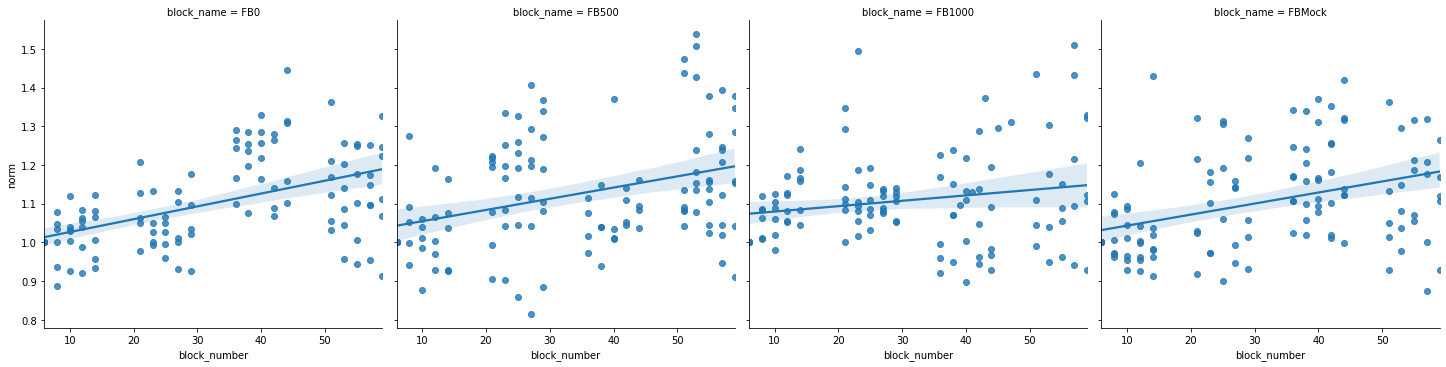

In [1378]:
sns.lmplot(x="block_number", y="norm", col="block_name", col_order=['FB0', 'FB500', 'FB1000', 'FBMock'], data=fin_mag_norm)



In [1379]:
pip install statsmodels

You should consider upgrading via the '/Users/belinskaia/.pyenv/versions/3.9.1/envs/brain3/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1380]:
factor_names = ['subj_id', 'block_name', 'metric_type']
scores_df = pd.DataFrame(columns=factor_names + ['metric', 'block_number'])
courses_df = pd.DataFrame(columns=factor_names + ['time_course', 'block_number'])


In [1381]:
for factors_values, group in df_all.groupby(factor_names):
    curve = group['metric'].values
    curve = pd.Series(curve).rolling(2, center=True).median().fillna(method='ffill').fillna(method='bfill')

/Users/belinskaia/.pyenv/versions/3.9.1/envs/brain3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


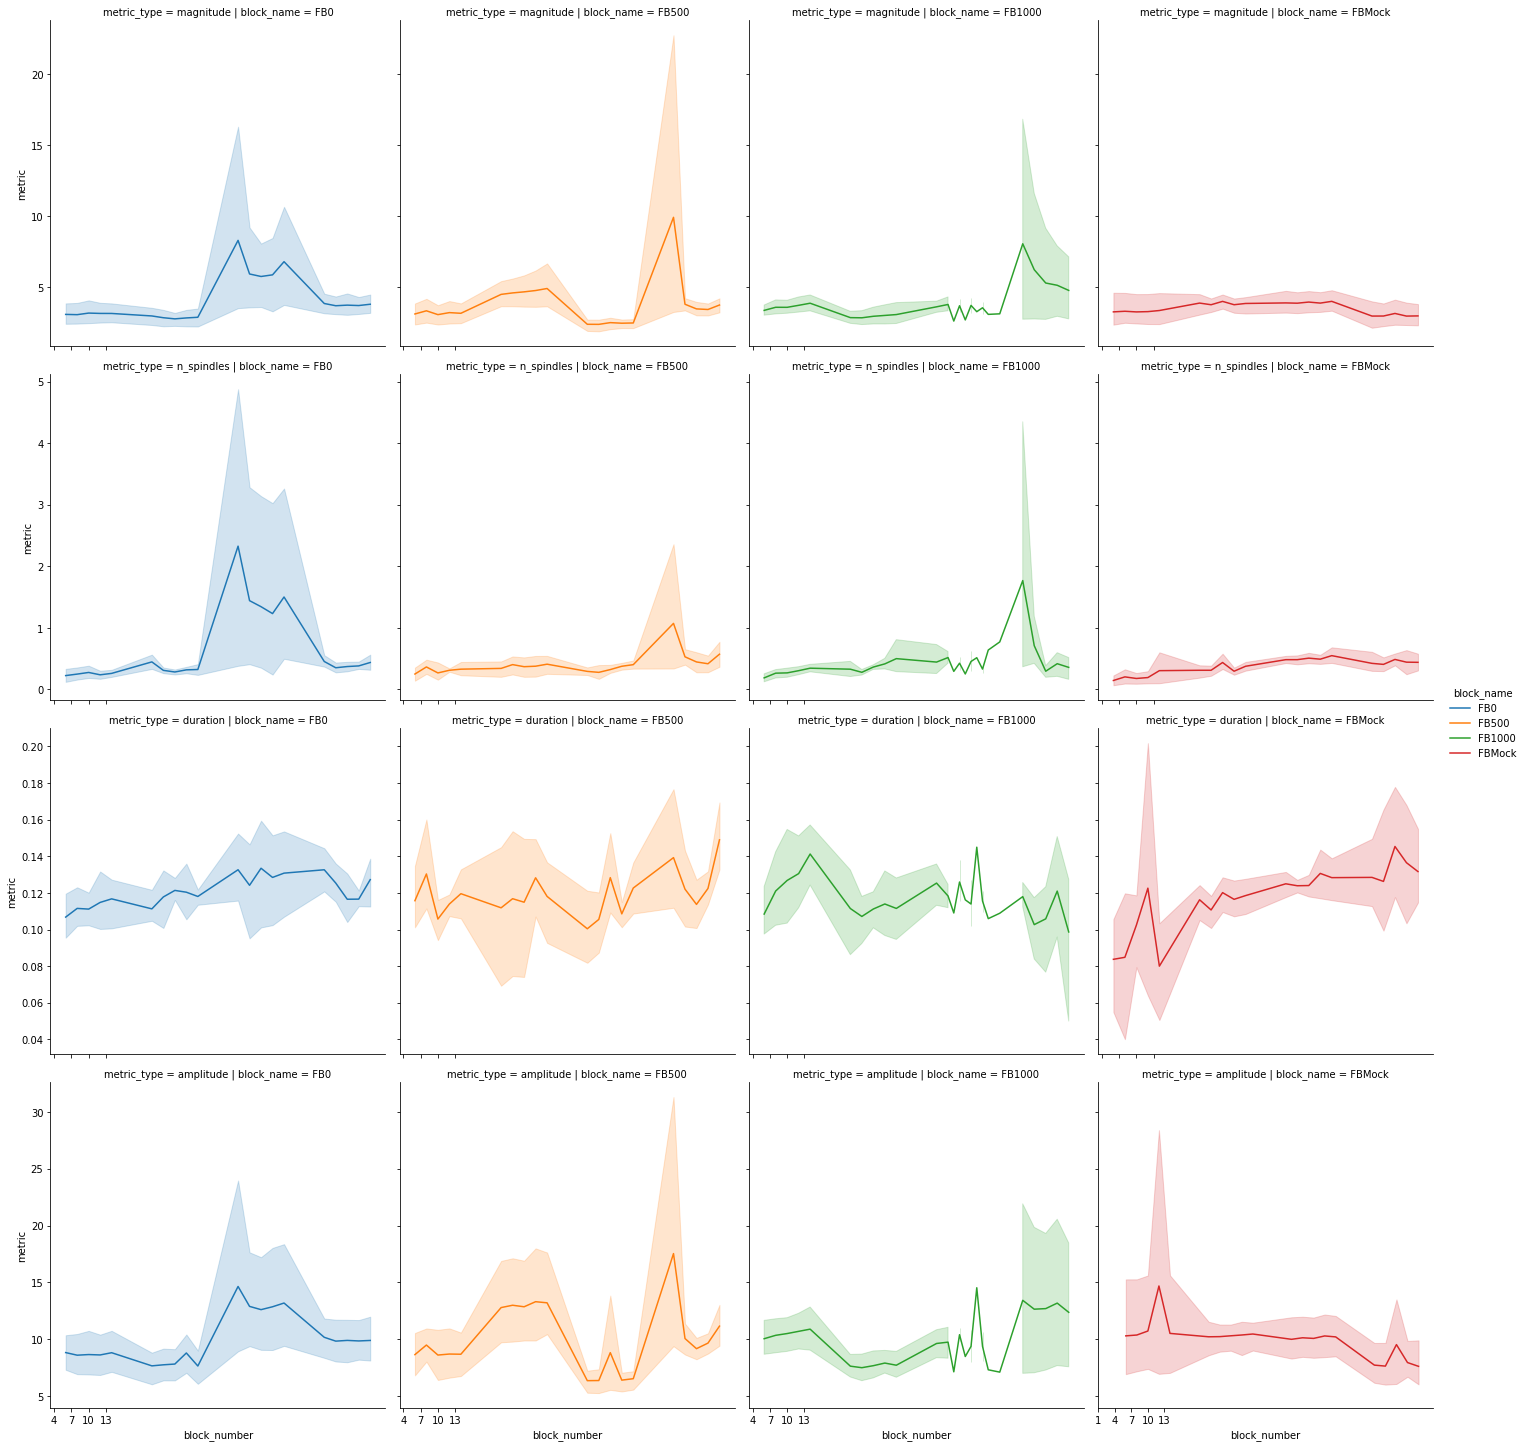

In [1382]:
g = sns.relplot('block_number', 'metric', 'block_name', data=df_all, row='metric_type', col='block_name', kind='line',
            facet_kws={'sharey': 'row'}, row_order=['magnitude', 'n_spindles', 'duration', 'amplitude'],
            col_order=['FB0', 'FB500', 'FB1000', 'FBMock'], hue_order=['FB0', 'FB500', 'FB1000', 'FBMock'])

g.axes[-1,-1].set_xticks(np.arange(1, 15, 3))

In [139]:
fin_amp = fin.loc[fin['metric_type'].isin(['amplitude'])]
fin_dur = fin.loc[fin['metric_type'].isin(['duration'])]
fin_mag = fin.loc[fin['metric_type'].isin(['magnitude'])]
fin_spin = fin.loc[fin['metric_type'].isin(['n_spindles'])]

In [140]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [141]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_dur).fit()
dur_aov_table = sm.stats.anova_lm(model, typ=2)
dur_aov_table

,sum_sq,df,F,PR(>F)
"C(order, Sum)",0.012622,3.0,4.737476,0.002898
"C(block_name, Sum)",0.001188,3.0,0.445736,0.720437
"C(order, Sum):C(block_name, Sum)",0.028507,9.0,3.566720,0.000270
Residual,0.394301,444.0,NaN,NaN


In [142]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_dur).fit()
dur_aov_table = sm.stats.anova_lm(model, typ=3)
dur_aov_table

,sum_sq,df,F,PR(>F)
Intercept,6.188153,1.0,6968.130721,1.524099e-273
"C(order, Sum)",0.009613,3.0,3.608057,1.342452e-02
"C(block_name, Sum)",0.000837,3.0,0.314072,8.152157e-01
"C(order, Sum):C(block_name, Sum)",0.028507,9.0,3.566720,2.697109e-04
Residual,0.394301,444.0,NaN,NaN


In [143]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_mag).fit()
mag_aov_table = sm.stats.anova_lm(model, typ=3)
mag_aov_table

,sum_sq,df,F,PR(>F)
Intercept,6673.132260,1.0,631.564352,2.447204e-87
"C(order, Sum)",80.585195,3.0,2.542271,5.577328e-02
"C(block_name, Sum)",17.572878,3.0,0.554383,6.454356e-01
"C(order, Sum):C(block_name, Sum)",439.615701,9.0,4.622943,7.344780e-06
Residual,4691.320393,444.0,NaN,NaN


In [144]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_spin).fit()
spin_aov_table = sm.stats.anova_lm(model, typ=3)
spin_aov_table

,sum_sq,df,F,PR(>F)
Intercept,96.691268,1.0,154.901641,1.035151e-30
"C(order, Sum)",12.910949,3.0,6.894546,1.514435e-04
"C(block_name, Sum)",4.953296,3.0,2.645098,4.868764e-02
"C(order, Sum):C(block_name, Sum)",26.623008,9.0,4.738964,4.913670e-06
Residual,277.149567,444.0,NaN,NaN


In [145]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_amp).fit()
amp_aov_table = sm.stats.anova_lm(model, typ=3)
amp_aov_table

,sum_sq,df,F,PR(>F)
Intercept,45080.785474,1.0,1737.011436,1.459282e-155
"C(order, Sum)",32.028883,3.0,0.411369,7.449140e-01
"C(block_name, Sum)",2.497376,3.0,0.032076,9.922748e-01
"C(order, Sum):C(block_name, Sum)",1607.050231,9.0,6.880154,2.701646e-09
Residual,11523.164636,444.0,NaN,NaN


In [146]:
table = {'metric type': ['magnitude', 'number_spin', 'duration','amplitude'], 'p-value order': [5.577328e-02
, 1.514435e-04, 1.342452e-02, 7.449140e-01], 'p-value fb type': [6.454356e-01,4.868764e-02,8.152157e-01,9.922748e-01],
             'p-value interaction':[7.344780e-06,4.913670e-06,2.697109e-04,2.701646e-09]}
table = pd.DataFrame(table) 
table


,metric type,p-value order,p-value fb type,p-value interaction
0,magnitude,0.055773,0.645436,7.344780e-06
1,number_spin,0.000151,0.048688,4.913670e-06
2,duration,0.013425,0.815216,2.697109e-04
3,amplitude,0.744914,0.992275,2.701646e-09


In [147]:
model = ols("metric ~ C(order) + C(block_name) + C(order)*C(block_name)", data=fin_mag).fit()
amp_aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

NameError: name 'aov_table' is not defined

In [149]:
fin_mag = fin.loc[fin['metric_type'].isin(['magnitude'])]

In [150]:
fin_spin.head(3)

,block_name,metric_type,subj_id,block_number,metric,order
345,FB0,n_spindles,2,6,0.388847,1.0
346,FB0,n_spindles,2,8,0.284692,1.0
347,FB0,n_spindles,2,10,0.277748,1.0


mag
1-2
P-value: 0.05147866795135099

1-3
P-value: 0.00252428145378482

1-4
P-value: 0.03390520168746676

2-3
P-value: 0.03710137787296669

2-4
P-value: 0.1315372561583429

3-4
P-value: 0.9249684173624989


spin
1-2
P-value: 2.7268889525193738e-06

1-3
P-value: 0.0001589109142036954

1-4
P-value: 0.00029066013701677915

2-3
P-value: 0.0022541907273392467

2-4
P-value: 0.02143309076326164

3-4

P-value: 0.1109604619481164




ampl

dur

In [166]:
first = fin_spin.loc[fin_spin['order'].isin([1])]
second = fin_spin.loc[fin_spin['order'].isin([2])]
third = fin_spin.loc[fin_spin['order'].isin([3])]
forth = fin_spin.loc[fin_spin['order'].isin([4])]

In [225]:
fin_spin = fin.loc[fin['metric_type'].isin(['duration'])]

In [226]:
third = fin_spin.loc[fin_spin['order'].isin([3])]
first_fb0 = third.loc[third['block_name'].isin(['FB0'])]
first_fb500 = third.loc[third['block_name'].isin(['FB500'])]
first_fb1000 = third.loc[third['block_name'].isin(['FB1000'])]
first_fbMock = third.loc[third['block_name'].isin(['FBMock'])]

In [227]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(first_fb0['metric'], first_fb1000['metric'],  equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print('H0 не верна, группы отличаются')
else:
    print('Н0 верна, группы не отличаются')

P-value: 0.11504956636370899
Н0 верна, группы не отличаются


In [228]:
df_3 = pd.DataFrame({'metric_type': ['magnitude', 'number_spin', 'duration','amplitude'],
                   'FB0-FM500': [0.0049,0.0049,0.0246,3.1076641624161515e-05],
                   'FB0-FB1000': [0.0057,0.0092,0.0115,0.0095],
                    'FB500-FB1000': [0.0012, 0.0244 ,0.2001, 0.0706],
                     'FB0-FBMock': [0.0114,0.0137,0.0538, 0.0246],
                     'FB500-FBMock': [0.0057,0.0049,0.0122,0.0023],
                     'FB1000-FBMock': [0.2302,0.1170,0.5603,0.3998]})
df_3.set_index('metric_type')
df_3

,metric_type,FB0-FM500,FB0-FB1000,FB500-FB1000,FB0-FBMock,FB500-FBMock,FB1000-FBMock
0,magnitude,0.004900,0.0057,0.0012,0.0114,0.0057,0.2302
1,number_spin,0.004900,0.0092,0.0244,0.0137,0.0049,0.1170
2,duration,0.024600,0.0115,0.2001,0.0538,0.0122,0.5603
3,amplitude,0.000031,0.0095,0.0706,0.0246,0.0023,0.3998


In [230]:
fdr = [0.0049,0.0049,0.0246,3.1076641624161515e-05, 0.0057,0.0092,0.0115,0.0095, 0.0012, 0.0244 ,0.2001, 0.0706]

In [232]:
#FDR_correction
import statsmodels.sandbox.stats.multicomp as multicomp
pval_corrected = multicomp.multipletests(df_3, method='fdr_bh', is_sorted=False, returnsorted=False)
pval_corrected
#reg_coef_df['pval_corrected'] = list(pval_corrected)

TypeError: '<' not supported between instances of 'float' and 'str'

In [104]:
table_3 = {'Diff. between blocks': ['First-Second', 'First-third', 'First-fourth','Second-third','Second-fourth','Third-fourth'],
           'Magnitude p-values': [ 0.05147866795135099, 0.00252428145378482, 0.03390520168746676, 0.03710137787296669, 0.1315372561583429, 0.9249684173624989], 'Number of spin. p-values': [2.7268889525193738e-06,0.0001589109142036954, 0.00029066013701677915, 0.0022541907273392467,0.02143309076326164,0.1109604619481164]}
table_3 = pd.DataFrame(table_3) 
table_3

,Diff. between blocks,Magnitude p-values,Number of spin. p-values
0,First-Second,0.051479,0.000003
1,First-third,0.002524,0.000159
2,First-fourth,0.033905,0.000291
3,Second-third,0.037101,0.002254
4,Second-fourth,0.131537,0.021433
5,Third-fourth,0.924968,0.110960


2 блок
маг 
0-мок
P-value: 2.545806170145239e-10

0-1000
P-value: 0.0562401765037972


0-500
P-value: 4.890554914392519e-07

500-мок
P-value: 0.06849869017043535

500-1000
P-value: 1.5244503867839614e-06

1000-мок
P-value: 2.5836991943184647e-09


spin
0-мок

0-1000


0-500

500-1000

1000-мок

4 блок
mag
0 - mock
P-value: 0.003945009486283221
0-1000
P-value: 0.06300770660480134
0-500 нет 
500-1000 нет
500-мок нет

3 блок
spin
0 - mock
P-value: 0.013781436826536113
0-1000
P-value: 0.009290796753193244
0-500
P-value: 0.00491615933765438

500-1000

1000-мок


mag
0 - mock
P-value: 0.011471930863944579
0-1000
P-value: 0.005772215261671846
0-500
P-value: 0.00016896494379250868

500-1000

1000-мок

500- мок

ampl
0 - mock
P-value: 0.011471930863944579
0-1000
P-value: 0.005772215261671846
0-500
P-value: 0.00016896494379250868

500-1000

1000-мок

dur
0 - mock
P-value: 0.011471930863944579
0-1000
P-value: 0.005772215261671846
0-500
P-value: 0.00016896494379250868

500-1000

1000-мок



In [107]:
table3 = {'FB0-FM500': ['magnitude'],
         'FB0-FB1000': ['magnitude'],
         'FB500-FB1000': ['magnitude'],
         'FB0-FBMock': ['magnitude'],
         'FB500-FBMock': ['magnitude'],
         'FB1000-FBMock': ['magnitude']}
table3 = pd.DataFrame(table3) 
table3

,FB0-FM500,FB0-FB1000,FB500-FB1000,FB0-FBMock,FB500-FBMock,FB1000-FBMock
0,magnitude,magnitude,magnitude,magnitude,magnitude,magnitude


In [ ]:
table_3 = {'FB0-FM500': ['FB0-FM500', 'FB0-FB1000', 'FB0-FBMock','FB500-FB1000','FB500-FBMock'],
           'metric type': ['magnitude', 'number_spin', 'duration','amplitude'], 'p-value order': [0.00016896494379250868, 0.005772215261671846, 0.011471930863944579]}
table_3 = pd.DataFrame(table_3) 
table_3

In [ ]:
#FDR_correction
import statsmodels.sandbox.stats.multicomp as multicomp
pval_corrected = multicomp.multipletests(reg_coef_df['p_value'], method='fdr_bh', is_sorted=False, returnsorted=False)[1]
reg_coef_df['pval_corrected'] = list(pval_corrected)

In [ ]:
fin.groupby(['order', 'metric_type', 'subj_id','block_number']).mean()['metric']

In [429]:
fin_mag = fin.loc[fin['metric_type'] == 'n_spindles']

In [93]:
#Linear regres coef 
from scipy import stats
reg_coef = []
fb_types = list(fin.block_name.unique())

for fb_type in fb_types:
    a =[]
    x = fin_mag.loc[fin_mag['block_name'] == fb_type].block_number
    y = fin_mag.loc[fin_mag['block_name'] == fb_type].metric
    a.append(fb_type)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    a.append(slope)
    a.append(intercept)
    a.append(r_value) 
    a.append(p_value) 
    a.append(std_err) 
    reg_coef.append(a) 

In [94]:
#Linear regres coef dataframe
reg_coef_df = pd.DataFrame(reg_coef) 
reg_coef_df = reg_coef_df.rename(columns={0: 'type', 1: "slope", 2: "intercept", 3: "r_value", 4: "p_value", 5: "std_err"})
reg_coef_df.reset_index(drop=True, inplace=True)

In [95]:
reg_coef_df

,type,slope,intercept,r_value,p_value,std_err
0,FB0,0.032449,3.179468,0.153402,0.101674,0.019663
1,FB1000,0.046045,2.491029,0.275056,0.002930,0.015140
2,FB500,0.020293,3.396784,0.071572,0.447189,0.026604
3,FBMock,-0.002529,3.636057,-0.037077,0.694029,0.006412


In [19]:
#Взять все метрики
magnitude = df_all.loc[df_all['metric_type'].isin(['magnitude'])]
#n_spindles
n_spindles = df_all.loc[df_all['metric_type'].isin(['n_spindles'])]
#duration
duration = df_all.loc[df_all['metric_type'].isin(['duration'])]
#amplitude
amplitude = df_all.loc[df_all['metric_type'].isin(['amplitude'])]


In [119]:
#Взять все метрики
magnitude_fb0 = duration.loc[duration['block_name'].isin(['FB0'])]
#n_spindles
magnitude_fb500 = duration.loc[duration['block_name'].isin(['FB500'])]
#duration
magnitude_fb1000 = duration.loc[duration['block_name'].isin(['FB1000'])]
#amplitude
magnitude_mock = duration.loc[duration['block_name'].isin(['FB1000'])]

In [461]:
fin = pd.DataFrame(data = group_signal).reset_index()

In [462]:
fin['block_number_abs']=fin['metric']
for subj_id in fin['subj_id'].unique():
    fin.loc[fin['subj_id']== subj_id, 'block_number_abs'] = np.arange(len(fin[(fin['subj_id']==subj_id)].block_number.unique()))

ValueError: Must have equal len keys and value when setting with an iterable

In [145]:
fin['block_number_abs'] = fin['block_number_abs'].astype(int)

In [146]:
fin['norm'] = fin['metric']
for subj_id in fin['subj_id'].unique():
    fin.loc[fin['subj_id']== subj_id, 'norm'] = fin.loc[fin['subj_id']== subj_id, 'norm']/fin.loc[(fin['subj_id']==subj_id)&(fin['block_number_abs']==0), 'norm'].mean()
    

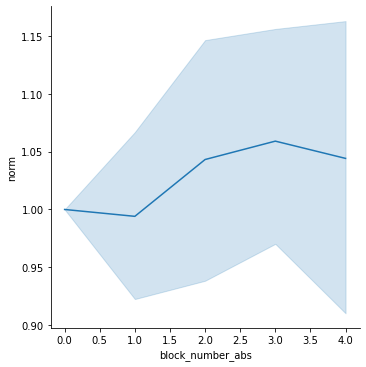

In [148]:
sns.relplot(x="block_number_abs", y="norm", data=fin, kind="line")